In [19]:
import pandas as pd

In [20]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
titanic.agg(
    {
        "Age": ["min", "max", "median", "skew"],
        "Fare": ["min", "max", "median", "mean"],
    }
)

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,NaN
mean,NaN,32.204208


In [22]:
titanic[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


In [23]:
titanic.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [24]:
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

In [25]:
air_quality = pd.read_csv(
    "data/air_quality_long.csv", index_col="date.utc", parse_dates=True
)
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


Let’s use a small subset of the air quality data set. We focus on NO2 data and only use the first two measurements of each location (i.e. the head of each group). The subset of data will be called

In [26]:
# filter for no2 data only
no2 = air_quality[air_quality["parameter"] == "no2"]

In [27]:
# use 2 measurements (head) for each location (groupby)
no2_subset = no2.sort_index().groupby(["location"]).head(2)
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


I want the values for the three stations as separate columns next to each other.

In [28]:
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


As pandas supports plotting of multiple columns (see plotting tutorial) out of the box, the conversion from long to wide table format enables the plotting of the different time series at the same time:

In [29]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


<Axes: xlabel='date.utc'>

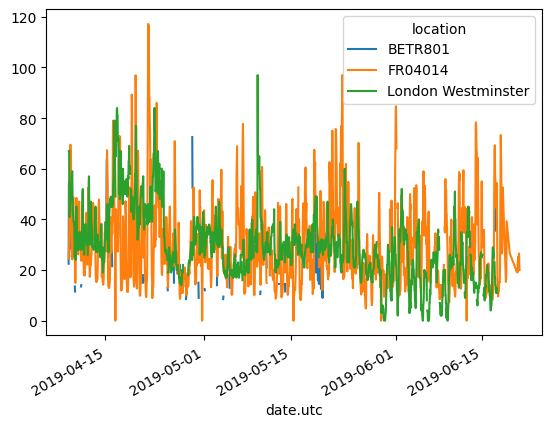

In [30]:
no2.pivot(columns="location", values="value").plot()

I want the mean concentrations for and in each of the stations in table form.

In [31]:
air_quality.pivot_table(
    index="location", values="value", columns="parameter", aggfunc="mean"
)

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


В случае с Pivot() данные только переупорядочиваются. Когда необходимо агрегировать несколько значений (в данном конкретном случае значения на разных временных шагах), можно использовать Pivot_table(), предоставляя функцию агрегирования (например, среднее значение), позволяющую объединить эти значения.

Pivot table is a well known concept in spreadsheet software. When interested in the row/column margins (subtotals) for each variable, set the margins parameter to True:

In [32]:
air_quality.pivot_table(
    values="value",
    index="location",
    columns="parameter",
    aggfunc="mean",
    margins=True,
)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


In case you are wondering, pivot_table() is indeed directly linked to groupby(). The same result can be derived by grouping on both parameter and location:

In [33]:
air_quality.groupby(["location", "parameter"])["value"].mean()

location            parameter
BETR801             no2          26.950920
                    pm25         23.169492
FR04014             no2          29.374284
London Westminster  no2          29.740050
                    pm25         13.443568
Name: value, dtype: float64

### REMEMBER
* Sorting by one or more columns is supported by sort_values.

* The pivot function is purely restructuring of the data, pivot_table supports aggregations.

* The reverse of pivot (long to wide format) is melt (wide to long format).

# How to combine data from multiple tables

## Concatenating objects

In [34]:
air_quality_no2 = pd.read_csv("data/air_quality_no2_long.csv",
                              parse_dates=True)


air_quality_no2 = air_quality_no2[["date.utc", "location",
                                   "parameter", "value"]]


air_quality_no2.head()

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


In [35]:
air_quality_pm25 = pd.read_csv("data/air_quality_pm25_long.csv",
                               parse_dates=True)


air_quality_pm25 = air_quality_pm25[["date.utc", "location",
                                     "parameter", "value"]]


air_quality_pm25.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


I want to combine the measurements of NO2 and PM25, two tables with a similar structure, in a single table.

In [36]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)

air_quality.head()

# The concat() function performs concatenation operations of multiple tables along one of the axes (row-wise or column-wise).

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


In [37]:
print('Shape of the ``air_quality_pm25`` table: ', air_quality_pm25.shape)

print('Shape of the ``air_quality_no2`` table: ', air_quality_no2.shape)

print('Shape of the resulting ``air_quality`` table: ', air_quality.shape)

Shape of the ``air_quality_pm25`` table:  (1110, 4)
Shape of the ``air_quality_no2`` table:  (2068, 4)
Shape of the resulting ``air_quality`` table:  (3178, 4)


In [38]:
air_quality = air_quality.sort_values("date.utc")

air_quality.head()

,date.utc,location,parameter,value
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0


In this specific example, the parameter column provided by the data ensures that each of the original tables can be identified. This is not always the case. The concat function provides a convenient solution with the keys argument, adding an additional (hierarchical) row index. For example:


In [41]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2], keys=["PM25", "NO2"])

air_quality_.head()

date.utc location parameter  value
PM25 0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
     1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
     2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
     3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
     4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5

## Join tables using a common identifier

In [42]:
stations_coord = pd.read_csv("data/air_quality_stations.csv")

stations_coord.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


In [43]:
air_quality.head()

,date.utc,location,parameter,value
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0


In [44]:
air_quality = pd.merge(air_quality, stations_coord, how="left", on="location")

air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude
0,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,51.49467,-0.13193
1,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83724,2.39390
2,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83722,2.39390
3,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,51.20966,4.43182
4,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,51.20966,4.43182


Using the merge() function, for each of the rows in the air_quality table, the corresponding coordinates are added from the air_quality_stations_coord table. Both tables have the column location in common which is used as a key to combine the information. By choosing the left join, only the locations available in the air_quality (left) table, i.e. FR04014, BETR801 and London Westminster, end up in the resulting table. The merge function supports multiple join options similar to database-style operations.

Add the parameters’ full description and name, provided by the parameters metadata table, to the measurements table.

In [45]:
air_quality_parameters = pd.read_csv("data/air_quality_parameters.csv")

air_quality_parameters.head()

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10


In [46]:
air_quality = pd.merge(air_quality, air_quality_parameters,
                       how='left', left_on='parameter', right_on='id')


air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude,id,description,name
0,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
1,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83724,2.39390,no2,Nitrogen Dioxide,NO2
2,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83722,2.39390,no2,Nitrogen Dioxide,NO2
3,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,51.20966,4.43182,no2,Nitrogen Dioxide,NO2


Compared to the previous example, there is no common column name. However, the parameter column in the air_quality table and the id column in the air_quality_parameters_name both provide the measured variable in a common format. The left_on and right_on arguments are used here (instead of just on) to make the link between the two tables.

REMEMBER
Multiple tables can be concatenated both column-wise and row-wise using the concat function.

For database-like merging/joining of tables, use the merge function.

# How to handle time series data with ease

In [47]:
import matplotlib.pyplot as plt

In [48]:
air_quality = pd.read_csv("data/air_quality_no2_long.csv")

air_quality = air_quality.rename(columns={"date.utc": "datetime"})

air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [51]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

## Using pandas datetime properties

I want to work with the dates in the column datetime as datetime objects instead of plain text

In [57]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

Initially, the values in datetime are character strings and do not provide any datetime operations (e.g. extract the year, day of the week,…). By applying the to_datetime function, pandas interprets the strings and convert these to datetime (i.e. datetime64[ns, UTC]) objects. In pandas we call these datetime objects similar to datetime.datetime from the standard library as pandas.Timestamp

As many data sets do contain datetime information in one of the columns, pandas input function like pandas.read_csv() and pandas.read_json() can do the transformation to dates when reading the data using the parse_dates parameter with a list of the columns to read as Timestamp:

pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=["datetime"])


Why are these pandas.Timestamp objects useful? Let’s illustrate the added value with some example cases.

What is the start and end date of the time series data set we are working with?

In [58]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

Using pandas.Timestamp for datetimes enables us to calculate with date information and make them comparable. Hence, we can use this to get the length of our time series:

In [59]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

I want to add a new column to the DataFrame containing only the month of the measurement

In [60]:
air_quality["month"] = air_quality["datetime"].dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


By using Timestamp objects for dates, a lot of time-related properties are provided by pandas. For example the month, but also year, quarter,… All of these properties are accessible by the dt accessor.

What is the average NO2 concentration for each day of the week for each of the measurement locations?

In [61]:
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Plot the typical NO2 pattern during the day of our time series of all stations together. In other words, what is the average value for each hour of the day?

'\nSimilar to the previous case, we want to calculate a given statistic (e.g. mean NO2) for each hour of the day and we can use the split-apply-combine approach again. For this case, we use the datetime property hour of pandas Timestamp, which is also accessible by the dt accessor. \n'

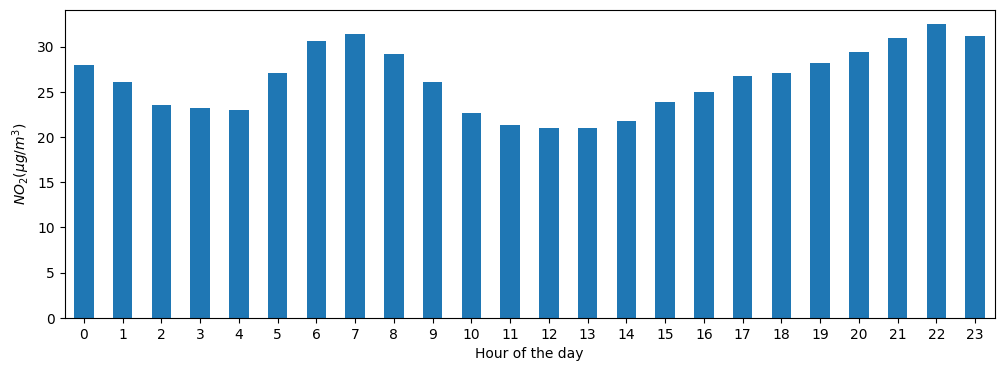

In [64]:
fig, axs = plt.subplots(figsize=(12, 4))

air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)

plt.xlabel("Hour of the day");  # custom x label using Matplotlib

plt.ylabel("$NO_2 (µg/m^3)$");

"""
Similar to the previous case, we want to calculate a given statistic (e.g. mean NO2) for each hour of the day and we can use the split-apply-combine approach again. For this case, we use the datetime property hour of pandas Timestamp, which is also accessible by the dt accessor. 
"""

## Datetime as index

In the tutorial on reshaping, pivot() was introduced to reshape the data table with each of the measurements locations as a separate column:

In [65]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")

no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


By pivoting the data, the datetime information became the index of the table. In general, setting a column as an index can be achieved by the set_index function.

Working with a datetime index (i.e. DatetimeIndex) provides powerful functionalities. For example, we do not need the dt accessor to get the time series properties, but have these properties available on the index directly:

In [66]:
no_2.index.year, no_2.index.weekday

(Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
        ...
        2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
       dtype='int32', name='datetime', length=1033),
 Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        ...
        3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
       dtype='int32', name='datetime', length=1033))

Some other advantages are the convenient subsetting of time period or the adapted time scale on plots. Let’s apply this on our data.

Create a plot of the NO2 values in the different stations from the 20th of May till the end of 21st of May

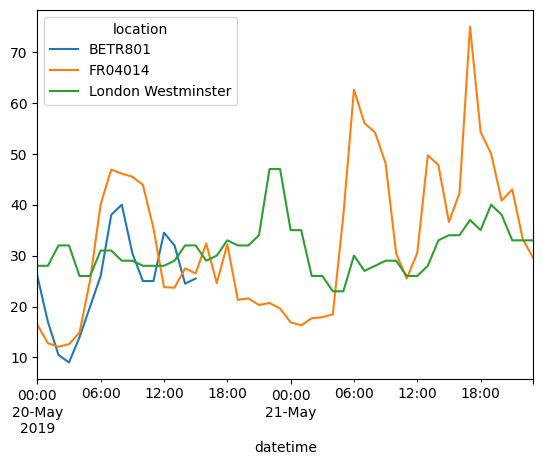

In [69]:
no_2["2019-05-20":"2019-05-21"].plot();

## Resample a time series to another frequency

Aggregate the current hourly time series values to the monthly maximum value in each of the stations.

In [70]:
monthly_max = no_2.resample("M").max()

monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


A very powerful method on time series data with a datetime index, is the ability to resample() time series to another frequency (e.g., converting secondly data into 5-minutely data).

The resample() method is similar to a groupby operation:

* it provides a time-based grouping, by using a string (e.g. M, 5H,…) that defines the target frequency

* it requires an aggregation function such as mean, max,…

An overview of the aliases used to define time series frequencies is given in the offset aliases overview table.

When defined, the frequency of the time series is provided by the freq attribute:

In [71]:
monthly_max.index.freq

<MonthEnd>

Make a plot of the daily mean NO2 value in each of the stations.

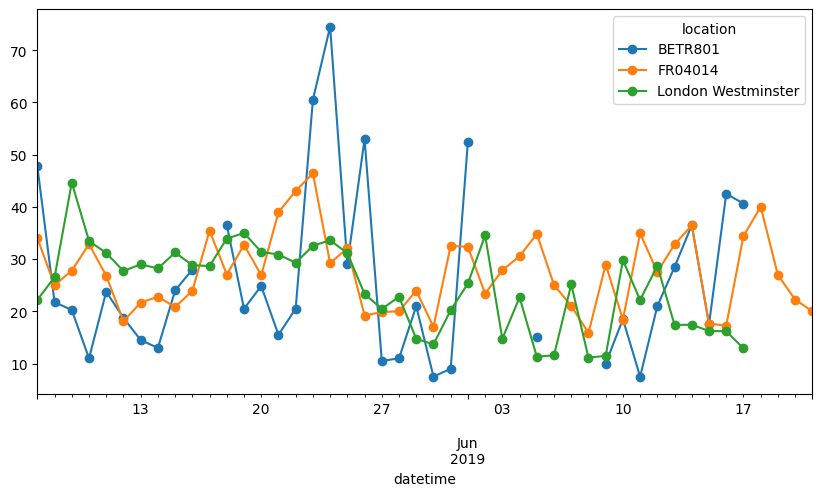

In [72]:
In [25]: no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));

More details on the power of time series resampling is provided in the user guide section on resampling.

### REMEMBER
* Valid date strings can be converted to datetime objects using to_datetime function or as part of read functions.

* Datetime objects in pandas support calculations, logical operations and convenient date-related properties using the dt accessor.

* A DatetimeIndex contains these date-related properties and supports convenient slicing.

* Resample is a powerful method to change the frequency of a time series.

# How to manipulate textual data

In [73]:
titanic = pd.read_csv("data/titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Make all name characters lowercase.

In [74]:
titanic["Name"].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

Create a new column Surname that contains the surname of the passengers by extracting the part before the comma.

In [75]:
titanic["Name"].str.split(",")

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

Using the Series.str.split() method, each of the values is returned as a list of 2 elements. The first element is the part before the comma and the second element is the part after the comma.

In [97]:
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)
titanic["Surname"] = titanic["Name"].str.split(",", expand=True)[0]

titanic["Surname"]

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Surname, Length: 891, dtype: object

Extract the passenger data about the countesses on board of the Titanic.

In [83]:
titanic["Name"].str.contains("Countess")

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

In [84]:
titanic[titanic["Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


Which passenger of the Titanic has the longest name?

In [85]:
titanic["Name"].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

To get the longest name we first have to get the lengths of each of the names in the Name column. By using pandas string methods, the Series.str.len() function is applied to each of the names individually (element-wise).

In [89]:
titanic["Name"].str.len().idxmax()

307

Next, we need to get the corresponding location, preferably the index label, in the table for which the name length is the largest. The idxmax() method does exactly that. It is not a string method and is applied to integers, so no str is used.

Based on the index name of the row (307) and the column (Name), we can do a selection using the loc operator, introduced in the tutorial on subsetting.

In [94]:
titanic.loc[titanic["Name"].str.len().idxmax(), "Name"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In the “Sex” column, replace values of “male” by “M” and values of “female” by “F”.

In [95]:
titanic["Sex_short"] = titanic["Sex"].replace({"male": "M", "female": "F"})

titanic["Sex_short"]

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: Sex_short, Length: 891, dtype: object

Whereas replace() is not a string method, it provides a convenient way to use mappings or vocabularies to translate certain values. It requires a dictionary to define the mapping {from : to}.

### REMEMBER
* String methods are available using the str accessor.

* String methods work element-wise and can be used for conditional indexing.

* The replace method is a convenient method to convert values according to a given dictionary.